# Assignment_3 SVM

In [311]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


# Part 2: SVM

### Use the following function to plot the classification regions

In [312]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [313]:
X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

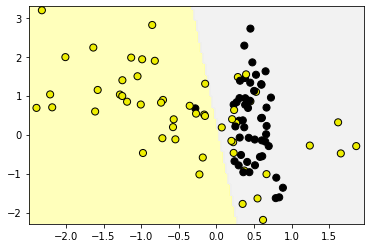

In [315]:
svc_linear = svm.SVC(kernel ='linear').fit(X_train, y_train)

plot_class_regions_for_classifier(svc_linear, X, y)


#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

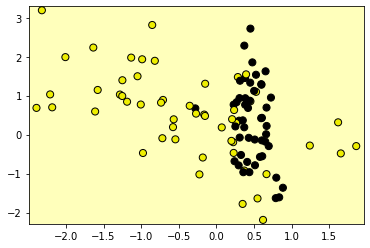

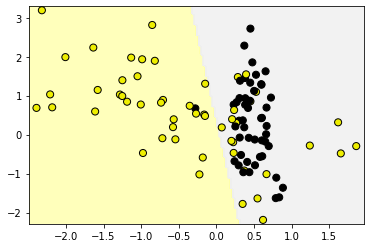

In [316]:
svc_linear_small_C = svm.SVC(kernel ='linear', C=0.00001).fit(X_train, y_train)
svc_linear_big_C = svm.SVC(kernel ='linear', C=100).fit(X_train, y_train)

plot_class_regions_for_classifier(svc_linear_small_C, X, y)
plot_class_regions_for_classifier(svc_linear_big_C, X, y)


**Comment** : in low value of C there are no hyperplane(no boundery)

### Use the fruits dataset in questions 4, 5, 6.

In [317]:
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [318]:
X_fruits = fruits.drop('fruit_label',axis = 1)
y_fruits = fruits["fruit_label"]
height_and_width_features = pd.concat([X_fruits["height"], X_fruits["width"]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(height_and_width_features, y_fruits, test_size = 0.25, random_state = 0)
linear_SVC = LinearSVC()
linear_SVC.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

4 SVM models, as we have 4 target values we get 4 different classes

In [319]:
print("models' coefficients are : ", linear_SVC.coef_)
print("models' intercept are : ", linear_SVC.intercept_)

models' coefficients are :  [[-0.27422451  0.4751859 ]
 [-1.10788136  0.78984192]
 [-0.03883243  0.21107498]
 [ 1.01087684 -1.26173938]]
models' intercept are :  [-1.54036589  0.78670813 -1.67042736  0.37211476]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


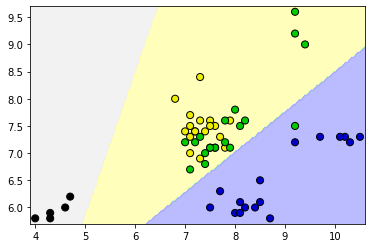

In [320]:
plot_class_regions_for_classifier(linear_SVC, height_and_width_features.to_numpy(), y_fruits.to_numpy())


from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [321]:
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [322]:
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}


In [323]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size = 0.25, random_state = 0)
svc_rbf = svm.SVC(kernel = "rbf")
clf = GridSearchCV(svc_rbf, parameters)
clf.fit(X_train,y_train)
print(clf.best_params_ )

{'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [324]:
svc_rbf_best_parameters = svm.SVC(kernel = "rbf", C = 10).fit(X_train,y_train)
print("Training Accuracy : ", svc_rbf_best_parameters.score(X_train,y_train))
print("Testing Accuracy : ", svc_rbf_best_parameters.score(X_test,y_test))

Training Accuracy :  0.9154929577464789
Testing Accuracy :  0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [325]:
X_cancer = pd.DataFrame(X_cancer)

scaler = MinMaxScaler()
scaler.fit(X_cancer)
X_cancer = scaler.transform(X_cancer)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size = 0.25, random_state = 0)

svc_improved = svm.SVC(kernel = "rbf", C = 10).fit(X_train,y_train)
print("Training Accuracy : ", svc_improved.score(X_train,y_train))
print("Testing Accuracy : ", svc_improved.score(X_test,y_test))

Training Accuracy :  0.9882629107981221
Testing Accuracy :  0.9790209790209791
